# The `MvsH` Experiment Class

The [`MvsH`](../../api/mvsh#magnetopy.experiments.mvsh.MvsH) class contains the data of a single magnetization vs. field (i.e., a hysteresis) experiment, along with a number of methods used for processing and working with the data.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

import magnetopy as mp

DATA_PATH = Path("../../tests/data")

## Creating an `MvsH` Object From Files

### Files with a Single Experiment

For files containing a single M vs. H experiment (i.e., data collected at a single temperature), the `MvsH` object can be created by simply passing the file path to the constructor:

In [2]:
mvsh4 = mp.MvsH(DATA_PATH / "mvsh4.dat")
mvsh4

MvsH at 293.0 K

The `as_dict()` method returns a dictionary of information about the experiment and any processing that has been performed on it. Note that these are all attributes of the `MvsH` object, and can be accessed directly as well.

In [3]:
mvsh4.as_dict()

{'origin_file': 'mvsh4.dat',
 'temperature': 293.0,
 'field_range': (-70000.375, 70000.3359375),
 'field_correction_file': '',
 'scaling': []}

And the data is stored in the `data` attribute. The columns of this `DataFrame` are created directly from the data file which, in this case, is a .dat file from a Quantum Design MPMS3. There are two additional columns at the end, `"uncorrected_moment"` and `"uncorrected_moment_err"`. The .dat file contains the magnetization data in one of two columns, depending on whether the measurements were done in DC or VSM mode. The `MvsH` class automatically determines which column contains the data, and stores it in the `"uncorrected_moment"` and `"uncorrected_moment_err"` columns, which are used for subsequent processing.

In [4]:
mvsh4.data.head()

,Comment,Time Stamp (sec),Temperature (K),Magnetic Field (Oe),Moment (emu),M. Std. Err. (emu),Transport Action,Averaging Time (sec),Frequency (Hz),Peak Amplitude (mm),...,Map 09,Map 10,Map 11,Map 12,Map 13,Map 14,Map 15,Map 16,uncorrected_moment,uncorrected_moment_err
0,NaN,3.860780e+09,293.223587,-70000.000000,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004099,0.000208
1,NaN,3.860780e+09,293.209259,-65000.421875,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004110,0.000209
2,NaN,3.860780e+09,293.174545,-60000.355469,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004117,0.000208
3,NaN,3.860780e+09,293.203033,-55000.378906,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004117,0.000208
4,NaN,3.860780e+09,293.191849,-50000.183594,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004120,0.000208


### Files with Multiple Experiments

Trying to create an `MvsH` object from a file containing multiple experiments will result in a `TemperatureDetectionError`:

In [5]:
try:
    mvsh1 = mp.MvsH(DATA_PATH / "mvsh1.dat")
except mp.experiments.mvsh.TemperatureDetectionError as e:
    print(e)

Auto-parsing of MvsH objects from DatFile objects requires that there be only one temperature in the data. Found 7 temperatures.


In this case we'll need to pass the temperature of our desired experiment to the constructor:

In [6]:
mvsh1_2k = mp.MvsH(DATA_PATH / "mvsh1.dat", temperature=2)
mvsh1_2k.as_dict()

{'origin_file': 'mvsh1.dat',
 'temperature': 2,
 'field_range': (-70000.35156, 70000.375),
 'field_correction_file': '',
 'scaling': []}

## Creating Multiple `MvsH` Objects From a Single File

In cases where a single file contains multiple experiments, we can create a list of `MvsH` objects by passing the file path to the `MvsH.get_all_in_file()` method:

In [7]:
mvsh1 = mp.MvsH.get_all_in_file(DATA_PATH / "mvsh1.dat")
for mvsh in mvsh1:
    print(mvsh)

MvsH at 2 K
MvsH at 4 K
MvsH at 6 K
MvsH at 8 K
MvsH at 10 K
MvsH at 12 K
MvsH at 300 K


This also works for files containing a single experiment, you'll just get a list with a single `MvsH` object in it.

In [8]:
mvsh4_list = mp.MvsH.get_all_in_file(DATA_PATH / "mvsh4.dat")
for mvsh in mvsh4_list:
    print(mvsh)

MvsH at 293.0 K


## Simplified Data and Segments

Whatever we're doing with this data, there are a lot more columns than we'll likely need. The `simplified_data()` method returns a `DataFrame` with only the relevant columns for an `MvsH` experiment:

In [9]:
mvsh11 = mp.MvsH(DATA_PATH / "mvsh11.dat")
mvsh11.simplified_data().head()

,time,temperature,field,moment,moment_err,chi,chi_err,chi_t,chi_t_err
0,3.886899e+09,4.999953,0.085553,-0.000045,6.638709e-07,-5.310496e-04,7.759755e-06,-2.655223e-03,3.879841e-05
1,3.886899e+09,4.999861,0.109997,-0.000046,1.130964e-06,-4.146267e-04,1.028179e-05,-2.073076e-03,5.140751e-05
2,3.886899e+09,4.999944,108.469070,-0.000148,2.639004e-05,-1.364675e-06,2.432955e-07,-6.823298e-06,1.216464e-06
3,3.886899e+09,4.999876,204.471832,0.000009,9.156850e-06,4.402288e-08,4.478294e-08,2.201089e-07,2.239092e-07
4,3.886899e+09,4.999945,300.352386,0.000246,1.018018e-05,8.198379e-07,3.389411e-08,4.099144e-06,1.694687e-07


In this case we haven't done any scaling or processing, so the `"moment"` and `"moment_err"` columns are the same as the `"uncorrected_moment"` and `"uncorrected_moment_err"` columns. We'll see how to scale the data in the next section.

Looking at the values of magnetic fields in the data, we can see that this experiment consists of a virgin, forward, and reverse scans:

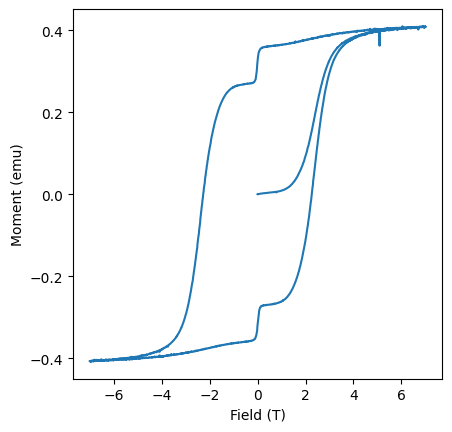

In [10]:
fig, ax = plt.subplots()
x = mvsh11.simplified_data()["field"] / 10000
y = mvsh11.simplified_data()["moment"]
ax.plot(x, y)
ax.set_xlabel("Field (T)")
ax.set_ylabel("Moment (emu)")
mp.force_aspect(ax) # a plot utility function in Magnetopy
plt.show()

For some analyses and/or visualizations, we may only want to work with a single segment of the data. `simplified_data()` has an optional `segment` argument that can be used to return only a single segment of the data:

In [11]:
mvsh11.simplified_data(segment="reverse").head()

,time,temperature,field,moment,moment_err,chi,chi_err,chi_t,chi_t_err
0,3.886900e+09,4.999997,70000.460938,0.408538,0.000393,0.000006,5.613738e-09,0.000029,2.806867e-08
1,3.886900e+09,5.000016,69999.851562,0.408824,0.000408,0.000006,5.821657e-09,0.000029,2.910838e-08
2,3.886900e+09,4.999962,69890.496094,0.408390,0.000389,0.000006,5.566526e-09,0.000029,2.783242e-08
3,3.886900e+09,5.000044,69798.500000,0.408776,0.000429,0.000006,6.151053e-09,0.000029,3.075553e-08
4,3.886900e+09,4.999870,69694.355469,0.408636,0.000383,0.000006,5.491631e-09,0.000029,2.745745e-08


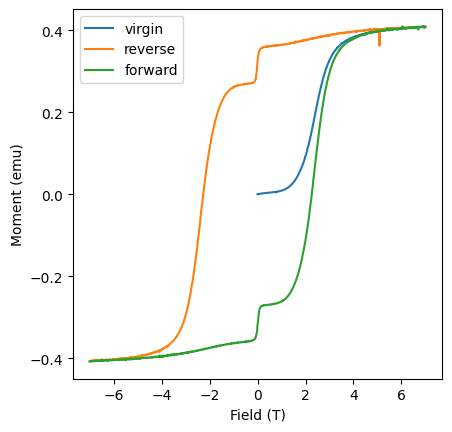

In [12]:
fig, ax = plt.subplots()
x1 = mvsh11.simplified_data(segment="virgin")["field"] / 10000
y1 = mvsh11.simplified_data(segment="virgin")["moment"]
x2 = mvsh11.simplified_data(segment="reverse")["field"] / 10000
y2 = mvsh11.simplified_data(segment="reverse")["moment"]
x3 = mvsh11.simplified_data(segment="forward")["field"] / 10000
y3 = mvsh11.simplified_data(segment="forward")["moment"]
ax.plot(x1, y1, label="virgin")
ax.plot(x2, y2, label="reverse")
ax.plot(x3, y3, label="forward")
ax.set_xlabel("Field (T)")
ax.set_ylabel("Moment (emu)")
ax.legend()
mp.force_aspect(ax)
plt.show()

## Scaling the Moment

Scaling is something you'll likely do through the [`Magnetometry`](../../api/magnetometry#magnetopy.magnetometry.Magnetometry) class, discussed in a later example notebook. However, the `Magnetometry` class uses methods within the `MvsH` class, and these methods can be used directly as well.

Scaling can be done using the `scale_moment()` method. As is described in the [underlying utility function](../../api/experiments_utils/#magnetopy.experiments.utils.scale_dc_data), this method adds columns to the `data` attribute of the `MvsH` object that contain the magnetic moment, magnetic susceptibility, and magnetic susceptibility times temperature (and their errors). The columns added are `"moment"`, `"moment_err"`, `"chi"`, `"chi_err"`, `"chi_t"`, and `"chi_t_err"`. The units of these values depend on the values of the `mass`, `eicosane_mass`, `molecular_weight`, and `diamagnetic_correction` which are passed as arguments. A record of what scaling was applied is added to the `scaling` attribute of the `MvsH` object.

Here are the currently supported scaling options:
- If `mass` is given but not `molecular_weight`, the only available scaling is a mass correction.
- If `mass` and `molecular` weight are given, a molar correction is applied. The molar correction can be further modified by giving `eicosane_mass` and/or `diamagnetic_correction`.

We'll use the [`SampleInfo`](../../api/magnetometry/#magnetopy.magnetometry.SampleInfo) class to read the sample information from the header of the .dat file:

In [13]:
sample_info = mp.SampleInfo.from_dat_file(DATA_PATH / "mvsh11.dat")
print(
    f"""{sample_info.mass = }
{sample_info.eicosane_mass = }
{sample_info.molecular_weight = }
{sample_info.diamagnetic_correction = }"""
)

sample_info.mass = 10.1
sample_info.eicosane_mass = 17.3
sample_info.molecular_weight = 704.95
sample_info.diamagnetic_correction = 0.0


We'll pass all of these to the `scale_moment()` method, even though the `diamagnetic_correction` is 0.

In [14]:
mvsh11.scale_moment(
    sample_info.mass,
    sample_info.eicosane_mass,
    sample_info.molecular_weight,
    sample_info.diamagnetic_correction
)

The `scaling` attribute records the scaling that was applied as a list of manipulations. In this case, with a mass, molecular weight, and eicosane mass, the scaling is recorded as a `"molar"` scaling with an `"eicosane"` correction:

In [15]:
mvsh11.scaling

['molar', 'eicosane']

The `mvsh.plot()` method will be discussed later, but for now notice that the default behavior, given molar scaling, is to plot the magnetization data in units of $N_A \mu_B$:

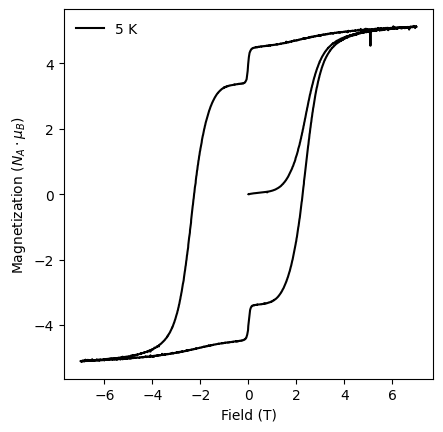

In [16]:
fig, ax = mvsh11.plot()

The plotting behavior works because the underlying `plot_mvsh()` function accesses the `simplified_data()` method. **`simplified_data()` always returns a `DataFrame` with the same columns, but the values and units of those columns are dependent on the scaling that has been applied.** Compare the current `simplified_data()` to the one we saw earlier:

In [17]:
mvsh11.simplified_data(segment="reverse").head()

,time,temperature,field,moment,moment_err,chi,chi_err,chi_t,chi_t_err
0,3.886900e+09,4.999997,70000.460938,5.118614,0.017930,0.408390,0.001431,2.041947,0.007153
1,3.886900e+09,5.000016,69999.851562,5.122193,0.018112,0.408679,0.001445,2.043400,0.007225
2,3.886900e+09,4.999962,69890.496094,5.116739,0.017861,0.408882,0.001427,2.044396,0.007136
3,3.886900e+09,5.000044,69798.500000,5.121548,0.018347,0.409806,0.001468,2.049048,0.007340
4,3.886900e+09,4.999870,69694.355469,5.119781,0.017745,0.410277,0.001422,2.051331,0.007110


## Correcting the Field for Flux Trapping

As described in [this Quantum Design application note](https://qdusa.com/siteDocs/appNotes/1500-021.pdf), the magnetic field reported by the magnetometer is determined by current from the magnet power supply and not by direct measurement. Flux trapping in the magnet can cause the reported field to be different from the actual field. While always present, it is most obvious in hysteresis curves of soft, non-hysteretic materials. In some cases the forward and reverse scans can have negative and postive coercivities, respectively, which is not physically possible.

The true field correction remedies this by using a Pd standard to determine the actual field applied to the sample. Assuming the calibration and sample sequences are the same, it is assumed that the flux trapping is the same for both sequences, and the calculated field from the measurement on the Pd standard is applied to the sample data.

Here's an M vs. H experiment that needs correction:

In [18]:
mvsh6 = mp.MvsH(DATA_PATH / "mvsh6.dat")

In the following plot, note that the forward segment has a negative coercivity and the reverse segment has a positive coercivity!

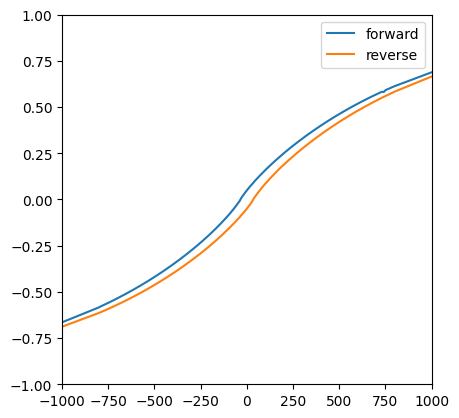

In [19]:
fig, ax = plt.subplots()
max_moment = mvsh6.simplified_data()["moment"].max()
x1 = mvsh6.simplified_data(segment="forward")["field"]
y1 = mvsh6.simplified_data(segment="forward")["moment"] / max_moment
x2 = mvsh6.simplified_data(segment="reverse")["field"]
y2 = mvsh6.simplified_data(segment="reverse")["moment"] / max_moment
ax.plot(x1, y1, label="forward")
ax.plot(x2, y2, label="reverse")
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1, 1)
ax.legend()
mp.force_aspect(ax)
plt.show()

The field correction can be applied by passing the path to the .dat file containing the same experiment (i.e., same field sequence) collected on a Pd standard to the `correct_field()` method:

In [20]:
mvsh6.correct_field(DATA_PATH / "Pd_std1.dat")

The corrected data removes the false coercivities:

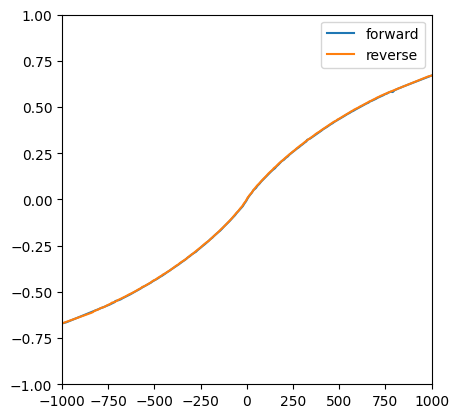

In [21]:
fig, ax = plt.subplots()
max_moment = mvsh6.simplified_data()["moment"].max()
x1 = mvsh6.simplified_data(segment="forward")["field"]
y1 = mvsh6.simplified_data(segment="forward")["moment"] / max_moment
x2 = mvsh6.simplified_data(segment="reverse")["field"]
y2 = mvsh6.simplified_data(segment="reverse")["moment"] / max_moment
ax.plot(x1, y1, label="forward")
ax.plot(x2, y2, label="reverse")
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1, 1)
ax.legend()
mp.force_aspect(ax)
plt.show()

Zooming in further we can see that the forward and reverse segments are mostly coincident and never cross:

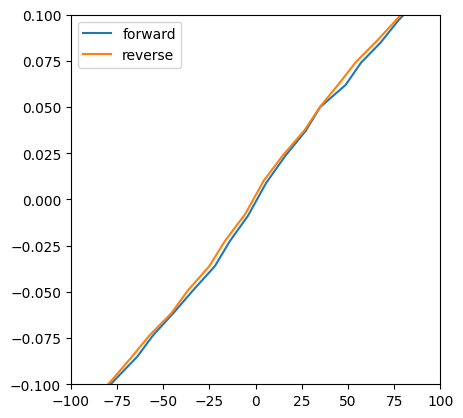

In [22]:
fig, ax = plt.subplots()
max_moment = mvsh6.simplified_data()["moment"].max()
x1 = mvsh6.simplified_data(segment="forward")["field"]
y1 = mvsh6.simplified_data(segment="forward")["moment"] / max_moment
x2 = mvsh6.simplified_data(segment="reverse")["field"]
y2 = mvsh6.simplified_data(segment="reverse")["moment"] / max_moment
ax.plot(x1, y1, label="forward")
ax.plot(x2, y2, label="reverse")
ax.set_xlim(-100, 100)
ax.set_ylim(-0.1, 0.1)
ax.legend()
mp.force_aspect(ax)
plt.show()

The name of the file used for the correction is stored in the `field_correction_file` attribute:

In [23]:
mvsh6.field_correction_file

'Pd_std1.dat'

The field correction can also be run by passing the name of a sequence within your [standard calibration library](../../standard_calibration_library). In our case, that's installed using the Rinehart group's [MagnetoPyCalibration](https://github.com/RinehartGroup/MagnetoPyCalibration) repository, and the desired sequence in this case is named `"sequence_1"`.

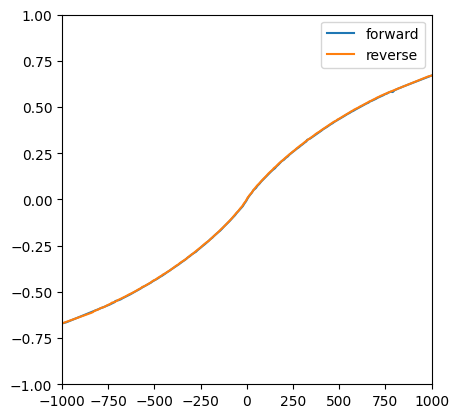

In [24]:
mvsh6 = mp.MvsH(DATA_PATH / "mvsh6.dat")
mvsh6.correct_field("sequence_1")

fig, ax = plt.subplots()
max_moment = mvsh6.simplified_data()["moment"].max()
x1 = mvsh6.simplified_data(segment="forward")["field"]
y1 = mvsh6.simplified_data(segment="forward")["moment"] / max_moment
x2 = mvsh6.simplified_data(segment="reverse")["field"]
y2 = mvsh6.simplified_data(segment="reverse")["moment"] / max_moment
ax.plot(x1, y1, label="forward")
ax.plot(x2, y2, label="reverse")
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1, 1)
ax.legend()
mp.force_aspect(ax)
plt.show()

The field correction file takes the name of the file in the standard calibration library:

In [25]:
mvsh6.field_correction_file

'mvsh_seq1.dat'

## Plotting

### Plot a Single `MvsH` Experiment

### Plot Multiple `MvsH` Experiments

### Plotting Raw Data